<a href="https://colab.research.google.com/github/a-forty-two/EY_batch7_18Sep/blob/main/19_Sep_003_TimeSeriesARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/a-forty-two/EY_batch7_18Sep/refs/heads/main/Superstore.csv')

In [4]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08/11/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08/11/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12/06/16,16/06/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11/10/15,18/10/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11/10/15,18/10/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [9]:
for colname in data.columns:
  print(colname, end = ' : ')
  print(data[colname].value_counts().count())
  print()

Row ID : 9994

Order ID : 5009

Order Date : 1237

Ship Date : 1334

Ship Mode : 4

Customer ID : 793

Customer Name : 793

Segment : 3

Country : 1

City : 531

State : 49

Postal Code : 631

Region : 4

Product ID : 1862

Category : 3

Sub-Category : 17

Product Name : 1850

Sales : 5825

Quantity : 14

Discount : 12

Profit : 7287



In [11]:
dataset = data.loc[:, ['Order Date', 'Sales']]
dataset.head()

,Order Date,Sales
0,08/11/16,261.9600
1,08/11/16,731.9400
2,12/06/16,14.6200
3,11/10/15,957.5775
4,11/10/15,22.3680


In [27]:
dataset['Order Date']= pd.to_datetime(dataset['Order Date'])
dataset.head()

<ipython-input-27-01726c354673>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['Order Date']= pd.to_datetime(dataset['Order Date'])


,Order Date,Sales
0,2016-08-11,261.9600
1,2016-08-11,731.9400
2,2016-12-06,14.6200
3,2015-11-10,957.5775
4,2015-11-10,22.3680


In [28]:
data_grouped = dataset.groupby('Order Date')
data_grouped = data_grouped['Sales'].sum().reset_index()

In [29]:
data_grouped.head(10)

,Order Date,Sales
0,2014-01-02,468.900
1,2014-01-03,2203.151
2,2014-01-04,119.888
3,2014-01-06,5188.520
4,2014-01-07,601.024
5,2014-01-08,228.328
6,2014-01-09,469.436
7,2014-01-10,4.710
8,2014-01-11,4732.080
9,2014-01-12,5624.390


In [30]:
data_grouped['Order Date'].min(), data_grouped['Order Date'].max()

(Timestamp('2014-01-02 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [31]:
data_grouped.set_index('Order Date', inplace=True)
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html
y = data_grouped['Sales'].resample('MS').mean()

In [32]:
y.head()

,Sales
Order Date,
2014-01-01,1206.404417
2014-02-01,579.232182
2014-03-01,2029.700222
2014-04-01,988.400640
2014-05-01,1097.771630


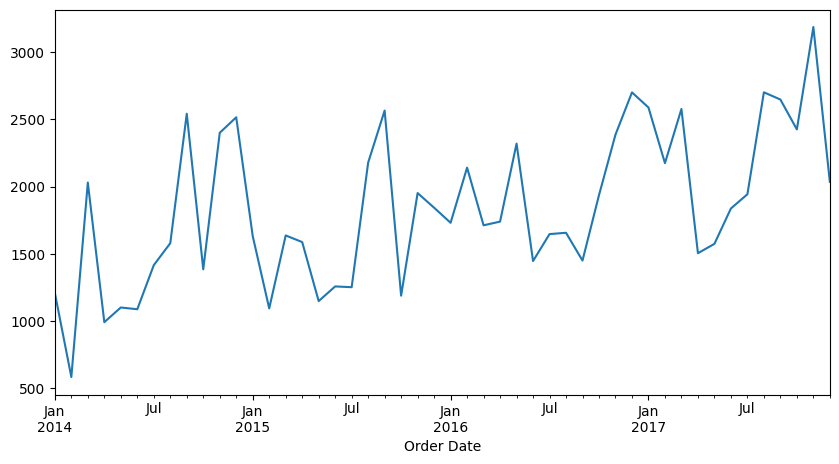

In [34]:
plt.figure()
y.plot(figsize=(10,5))
plt.show()


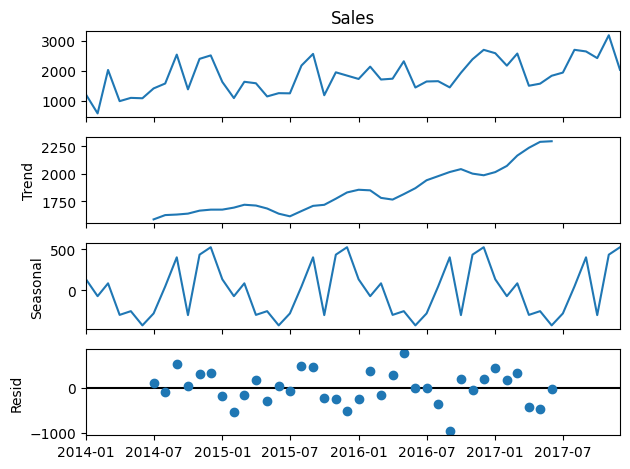

In [41]:
# DECOMPOSE -> break your graph into smaller consistent graphs

# PATTERN or SEASON or PERIOD -> pattern repeating over a time-period
# TREND or DIRECTION or SLOPE -> data is incr/decr -> dy/dt
# Residue or Noise -> whatever is left!-> original data - pattern - trend
import statsmodels.tsa
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(y, model='additive')
result.plot()
plt.show()

In [ ]:
# ALL POSSIBLE COMBINATIONS of these 3 graphs:

# S + T + R, S + T, S + R, T + R, S, R, T

# match this with 3 algorithms -> AR, I, MA
# Auto regression integrated with moving averages

# AR with I MA, AR without I MA (1,1,1) and (1,0,1)

# (0,0,0) to (1,1,1)

# Typically represented as

# (p,d,q) X (seasonal_length, t, s, r)

# (AR, I , MA) X (12, T, S, R)

# FROM (0,0,0) X (12,0,0,0) to (1,1,1) X (12,1,1,1)


In [ ]:
# AND

# x1. x2
# 0.   0.  0
#.0.   1.  0
# 1.   0.  0
# 1.   1.  1

In [ ]:
# GRID SEARCH -> exhaustive search with ALL possible combinations
# BEST model will be selection
# this is resource, cost and time exhaustive

# Random Search -> some combinations will be created, and out of them
# the most-appropriate/workable model will be selected (NOT the best)
# resource friendly and quick/dirty method

# Bayesian Search-> next combination is expected to be better than the previous model
# a very good model may be selected; not neccessarily the best
# probabilistic-> may or may not give us the best model, but is time-efficient

# HYPERPARAMETERS -> all adjustments made by developers that we not part of our dataset!
# in neural networks-> EPOCH, LR, BATCH_SIZE, HIDDEN_UNITS
# decision tree-> max_depth; Random Forest-> n_estimators

# best answer= ? WE DON'T KNOW!

# Hyperparameter tuning-> FINDING what combinations will give us
# best possible answers within the given resources!
# 3 algorithms-> GRID, RANDOMIZED, BAYESIAN



In [38]:
import itertools
p=d=q=range(0,2) # VALUE generators between [0,1]
pdq = list(itertools.product(p,d,q))
print(pdq)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


In [39]:
seasons = 12 # my data granularity is monthly -> so to take 1 year as a SEASON, i have to take
# 12 months
# LIST COMPREHENSION -> (0,0,0) -> (0,0,0,12)
seasonal_pdq = [   (x[0],x[1],x[2], seasons)  for x in pdq] # if x was (0,1,0), -> (0,1,0,12)
print('SARIMAX individual MODEL = {} X {}'.format(pdq[5], seasonal_pdq[0]))
print('SARIMAX individual MODEL = {} X {}'.format(pdq[5], seasonal_pdq[1]))
print('SARIMAX individual MODEL = {} X {}'.format(pdq[5], seasonal_pdq[2]))
print('SARIMAX individual MODEL = {} X {}'.format(pdq[5], seasonal_pdq[3]))

SARIMAX individual MODEL = (1, 0, 1) X (0, 0, 0, 12)
SARIMAX individual MODEL = (1, 0, 1) X (0, 0, 1, 12)
SARIMAX individual MODEL = (1, 0, 1) X (0, 1, 0, 12)
SARIMAX individual MODEL = (1, 0, 1) X (0, 1, 1, 12)


In [43]:
import statsmodels.api as sm
min_pdq = (999,999,999)
min_spdq = (999,999,999,12)
min_AIC = 999
for param in pdq:
  for sparam in seasonal_pdq:
    try:
      model = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=sparam, enforce_stationarity=False)
      predictions = model.fit()
      print('Model={}X{}. AIC= {}'.format(param, sparam, predictions.aic))
      if(predictions.aic < min_AIC):
        min_pdq = param
        min_spdq = sparam
        min_AIC = predictions.aic
    except Exception as e:
      print(e)
      continue

print('**** Smallest PDQ,SPDQ is *****')
print(min_AIC)
print(min_pdq)
print(min_spdq)


Model=(0, 0, 0)X(0, 0, 0, 12). AIC= 846.7545980747906
Model=(0, 0, 0)X(0, 0, 1, 12). AIC= 603.9377942364488
Model=(0, 0, 0)X(0, 1, 0, 12). AIC= 552.3935219283636
Model=(0, 0, 0)X(0, 1, 1, 12). AIC= 370.234134786945
Model=(0, 0, 0)X(1, 0, 0, 12). AIC= 568.0403610654619


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observa

Model=(0, 0, 0)X(1, 0, 1, 12). AIC= 545.1591320612782
Model=(0, 0, 0)X(1, 1, 0, 12). AIC= 384.6994549928634
Model=(0, 0, 0)X(1, 1, 1, 12). AIC= 371.48118917996896
Model=(0, 0, 1)X(0, 0, 0, 12). AIC= 789.0221941488076


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Model=(0, 0, 1)X(0, 0, 1, 12). AIC= 562.4967131802725
Model=(0, 0, 1)X(0, 1, 0, 12). AIC= 537.1375070951736
Model=(0, 0, 1)X(0, 1, 1, 12). AIC= 350.256711639438


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Model=(0, 0, 1)X(1, 0, 0, 12). AIC= 568.9522369003645


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Model=(0, 0, 1)X(1, 0, 1, 12). AIC= 529.0123392084691
Model=(0, 0, 1)X(1, 1, 0, 12). AIC= 383.28389664863636
Model=(0, 0, 1)X(1, 1, 1, 12). AIC= 351.6465909258256
Model=(0, 1, 0)X(0, 0, 0, 12). AIC= 724.8868973586492
Model=(0, 1, 0)X(0, 0, 1, 12). AIC= 529.1330663036122
Model=(0, 1, 0)X(0, 1, 0, 12). AIC= 550.7074240700707
Model=(0, 1, 0)X(0, 1, 1, 12). AIC= 353.46021554826507


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Model=(0, 1, 0)X(1, 0, 0, 12). AIC= 543.7038519439859
Model=(0, 1, 0)X(1, 0, 1, 12). AIC= 525.2577137371051
Model=(0, 1, 0)X(1, 1, 0, 12). AIC= 373.76775638401966


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Model=(0, 1, 0)X(1, 1, 1, 12). AIC= 355.08043943545573
Model=(0, 1, 1)X(0, 0, 0, 12). AIC= 692.1498724305646
Model=(0, 1, 1)X(0, 0, 1, 12). AIC= 507.3074752865484
Model=(0, 1, 1)X(0, 1, 0, 12). AIC= 521.5199071501494


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Model=(0, 1, 1)X(0, 1, 1, 12). AIC= 327.87284355625684
Model=(0, 1, 1)X(1, 0, 0, 12). AIC= 538.4901661551613


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model=(0, 1, 1)X(1, 0, 1, 12). AIC= 503.9199285566874
Model=(0, 1, 1)X(1, 1, 0, 12). AIC= 363.8791798360202


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Model=(0, 1, 1)X(1, 1, 1, 12). AIC= 328.0638228076727
Model=(1, 0, 0)X(0, 0, 0, 12). AIC= 741.6886669782987


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Model=(1, 0, 0)X(0, 0, 1, 12). AIC= 546.2107265739926
Model=(1, 0, 0)X(0, 1, 0, 12). AIC= 551.9710862238635


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Model=(1, 0, 0)X(0, 1, 1, 12). AIC= 367.19630925123596
Model=(1, 0, 0)X(1, 0, 0, 12). AIC= 544.9023423570067
Model=(1, 0, 0)X(1, 0, 1, 12). AIC= 541.3311331917399
Model=(1, 0, 0)X(1, 1, 0, 12). AIC= 367.73071652316037


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Model=(1, 0, 0)X(1, 1, 1, 12). AIC= 368.63767481474565
Model=(1, 0, 1)X(0, 0, 0, 12). AIC= 708.4487999307916


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Model=(1, 0, 1)X(0, 0, 1, 12). AIC= 519.7737023307682
Model=(1, 0, 1)X(0, 1, 0, 12). AIC= 538.821843782611


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model=(1, 0, 1)X(0, 1, 1, 12). AIC= 345.312750488618
Model=(1, 0, 1)X(1, 0, 0, 12). AIC= 533.6856474132833


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Model=(1, 0, 1)X(1, 0, 1, 12). AIC= 516.617670490323
Model=(1, 0, 1)X(1, 1, 0, 12). AIC= 365.2690257435657


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Model=(1, 0, 1)X(1, 1, 1, 12). AIC= 345.62796820970175
Model=(1, 1, 0)X(0, 0, 0, 12). AIC= 715.9626869243225
Model=(1, 1, 0)X(0, 0, 1, 12). AIC= 524.9563083075428
Model=(1, 1, 0)X(0, 1, 0, 12). AIC= 546.8877777199399
Model=(1, 1, 0)X(0, 1, 1, 12). AIC= 351.2406324176981
Model=(1, 1, 0)X(1, 0, 0, 12). AIC= 524.9081004557972


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Model=(1, 1, 0)X(1, 0, 1, 12). AIC= 521.5117303093174
Model=(1, 1, 0)X(1, 1, 0, 12). AIC= 353.73186461799304


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Model=(1, 1, 0)X(1, 1, 1, 12). AIC= 352.5872578517674
Model=(1, 1, 1)X(0, 0, 0, 12). AIC= 692.7387635567281
Model=(1, 1, 1)X(0, 0, 1, 12). AIC= 508.2642115581462
Model=(1, 1, 1)X(0, 1, 0, 12). AIC= 522.700938205877


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Model=(1, 1, 1)X(0, 1, 1, 12). AIC= 329.45826154016027
Model=(1, 1, 1)X(1, 0, 0, 12). AIC= 521.8039615258645


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model=(1, 1, 1)X(1, 0, 1, 12). AIC= 504.67422432312054
Model=(1, 1, 1)X(1, 1, 0, 12). AIC= 348.778860246954


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Model=(1, 1, 1)X(1, 1, 1, 12). AIC= 329.9608219857785
**** Smallest PDQ,SPDQ is *****
327.87284355625684
(0, 1, 1)
(0, 1, 1, 12)


In [49]:
model = sm.tsa.statespace.SARIMAX(y, order=min_pdq, seasonal_order= min_spdq, enforce_stationarity=False)
# (1, 1, 1)X(0, 0, 0, 12)
model2 = sm.tsa.statespace.SARIMAX(y, order=(1, 1, 1), seasonal_order= (0, 0, 0, 12), enforce_stationarity=False)
results = model.fit()
results2 = model2.fit()
# we've taken 2 models so that we can compare their predictions
results.summary() #.tables[1]  # AIC => needs to be lowest
# results.summary()



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -160.936
Date:                            Thu, 19 Sep 2024   AIC                            327.873
Time:                                    11:38:49   BIC                            331.006
Sample:                                01-01-2014   HQIC                           328.553
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9981      7.975     -0.125      0.900     -16.629      14.633
ma.S.L12      -0.9931     11.761     -0.084      0.933     -24.044      22.058
sigma2      1.907e+05   2.62e+06      0.073      0.942   -4.95e+06    5.33e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.50   Jarque-Bera (JB):                 3.07
Prob(Q):                              0.48   Prob(JB):                         0.22
Heteroskedasticity (H):               0.47   Skew:                            -0.91
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

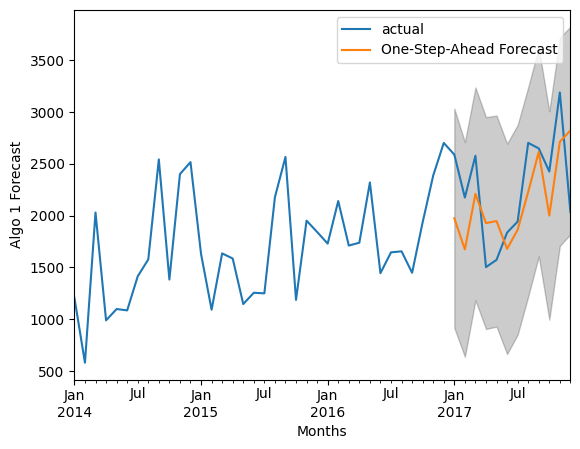

In [50]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
pred2 = results2.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred2_ci = pred2.conf_int()
ax = y['2014':].plot(label='actual') # ACTUAL DATA PLOT
pred.predicted_mean.plot(ax=ax, label='One-Step-Ahead Forecast')
# there is always a tolerance or error kernel(region) surrounding the forecast
# +- region within which mistakes are acceptable
# THIS TOLERANCE REGION is also called CONFIDENCE INTERVAL
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k', alpha=0.2)
# BASE LINE-> index, lower confidence limit, upper confidence limit
ax.set_xlabel('Months')
ax.set_ylabel('Algo 1 Forecast')
plt.legend()
plt.show()

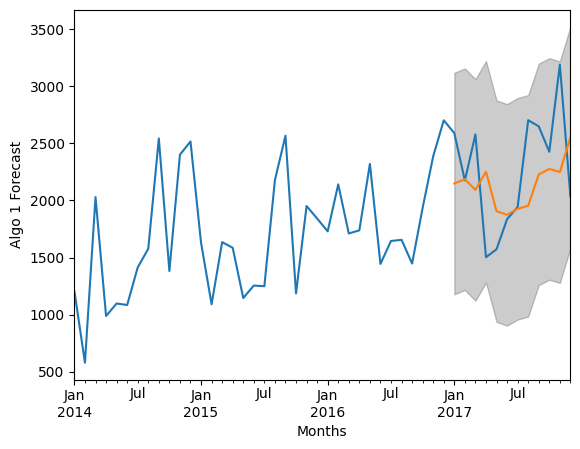

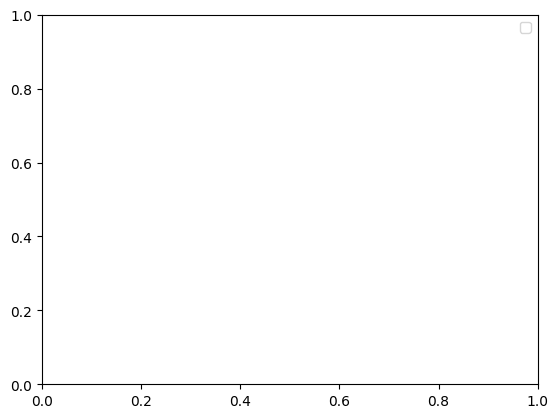

In [52]:
ax = y['2014':].plot(label='actual')
plt.figure()
pred2.predicted_mean.plot(ax=ax, label='One-Step-Ahead Forecast')
# there is always a tolerance or error kernel(region) surrounding the forecast
# +- region within which mistakes are acceptable
# THIS TOLERANCE REGION is also called CONFIDENCE INTERVAL
ax.fill_between(pred2_ci.index, pred2_ci.iloc[:,0], pred2_ci.iloc[:,1], color='k', alpha=0.2)
# BASE LINE-> index, lower confidence limit, upper confidence limit
ax.set_xlabel('Months')
ax.set_ylabel('Algo 1 Forecast')
plt.legend()
plt.show()